1. Analyze sales trends over time to identify seasonal patterns or growth opportunities.
2. Explore the popularity of different product categories across regions.
3. Investigate the impact of payment methods on sales volume or revenue.
4. Identify top-selling products within each category to optimize inventory and marketing strategies.
5. Evaluate the performance of specific products or categories in different regions to tailor marketing campaigns accordingly.

In [1]:
import pandas as pd
df = pd.read_csv('Online Sales Data.csv')
df.head()


,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [ ]:
df.isnull().sum()

,0
Transaction ID,0
Date,0
Product Category,0
Product Name,0
Units Sold,0
Unit Price,0
Total Revenue,0
Region,0
Payment Method,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(240, 9)

In [ ]:
df.describe()

,Transaction ID,Units Sold,Unit Price,Total Revenue
count,240.00000,240.000000,240.000000,240.000000
mean,10120.50000,2.158333,236.395583,335.699375
std,69.42622,1.322454,429.446695,485.804469
min,10001.00000,1.000000,6.500000,6.500000
25%,10060.75000,1.000000,29.500000,62.965000
50%,10120.50000,2.000000,89.990000,179.970000
75%,10180.25000,3.000000,249.990000,399.225000
max,10240.00000,10.000000,3899.990000,3899.990000


# **Question 1**

Analyze sales trends over time to identify seasonal patterns or growth opportunities.

In [ ]:
import pandas as pd
df['Date'] = pd.to_datetime(df['Date'])
print("Date Range:", df['Date'].min(), "to", df['Date'].max())


Date Range: 2024-01-01 00:00:00 to 2024-08-27 00:00:00


In [ ]:
df['Month'] = df['Date'].dt.month_name()
df.head()


,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,Month
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card,January
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal,January
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card,January
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card,January
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal,January


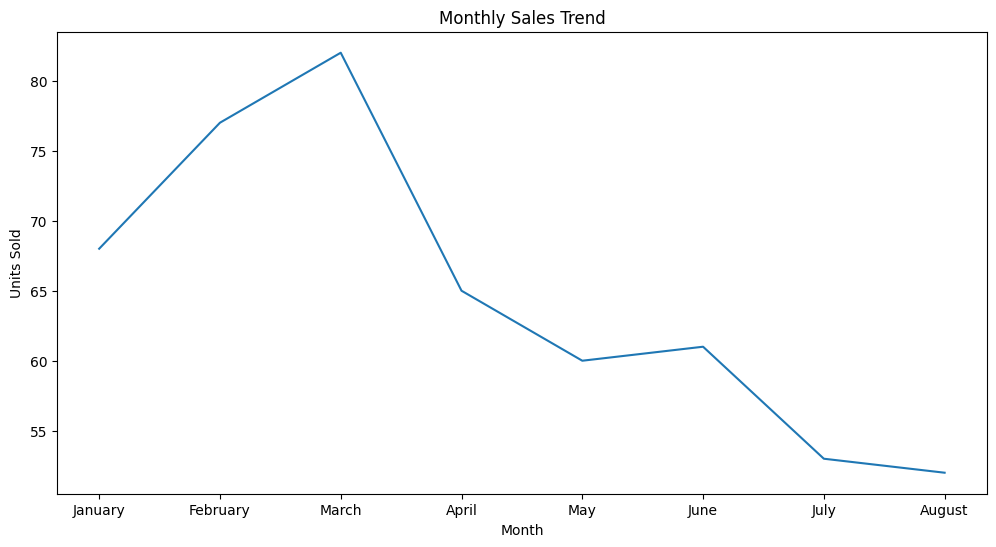

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

monthly_sales = df.groupby('Month')['Units Sold'].sum().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.title('Monthly Sales Trend')
plt.show()


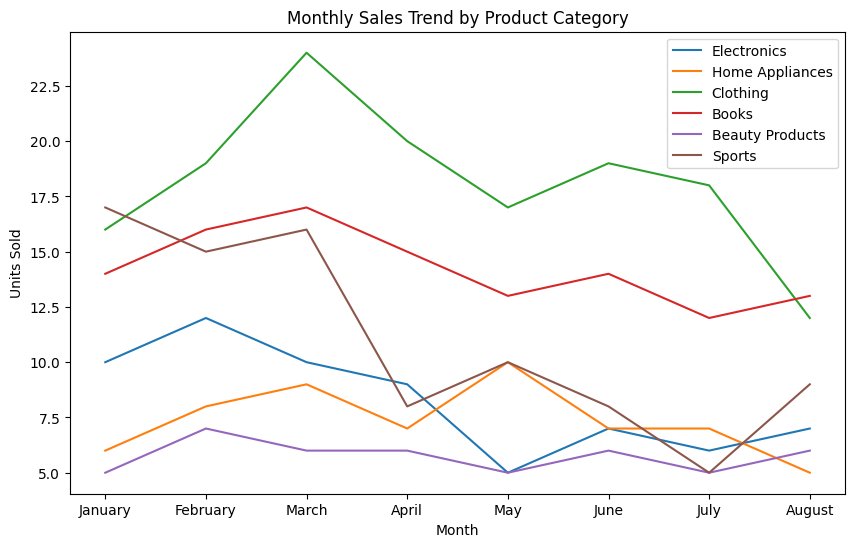

In [ ]:
# prompt: Make a line chart for units sold per month sequentially, make it for all product categories

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
for category in df['Product Category'].unique():
  monthly_sales = df[df['Product Category'] == category].groupby('Month')['Units Sold'].sum().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
  sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, label=category)
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.title('Monthly Sales Trend by Product Category')
plt.legend()
plt.show()


Product sales showed a positive trend in January-March

# **Question 2**

Explore the popularity of different product categories across regions

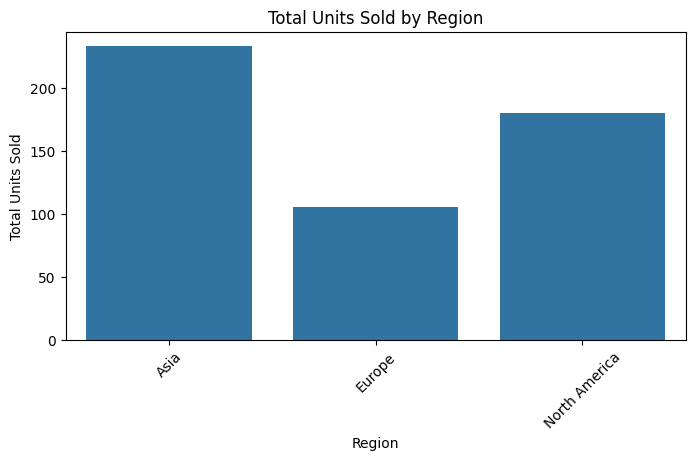

In [ ]:
import matplotlib.pyplot as plt
region_sales = df.groupby('Region')['Units Sold'].sum()

plt.figure(figsize=(8, 4))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.xlabel('Region')
plt.ylabel('Total Units Sold')
plt.title('Total Units Sold by Region')
plt.xticks(rotation=45)
plt.show()


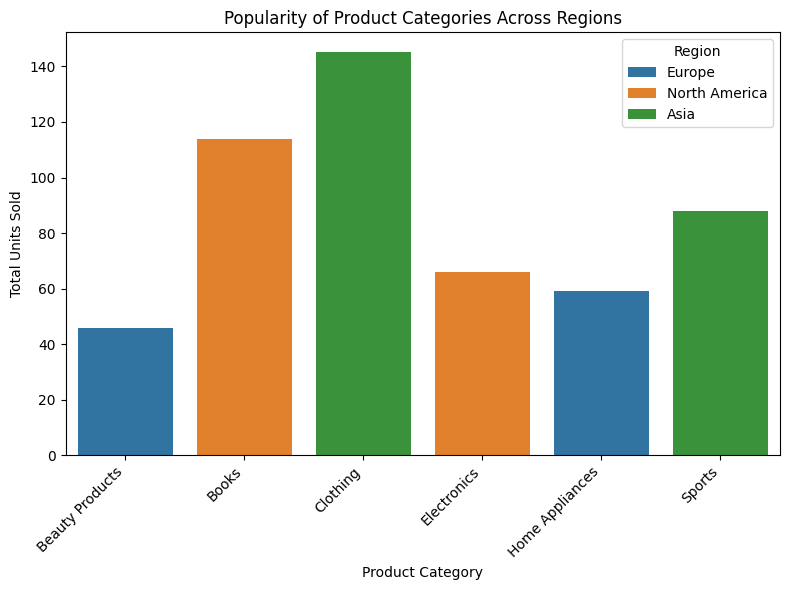

In [ ]:
# prompt: chart bar sum unit sold each product category for each region

import matplotlib.pyplot as plt
category_region_sales = df.groupby(['Product Category', 'Region'])['Units Sold'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Product Category', y='Units Sold', hue='Region', data=category_region_sales)
plt.xlabel('Product Category')
plt.ylabel('Total Units Sold')
plt.title('Popularity of Product Categories Across Regions')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region')
plt.tight_layout()
plt.show()


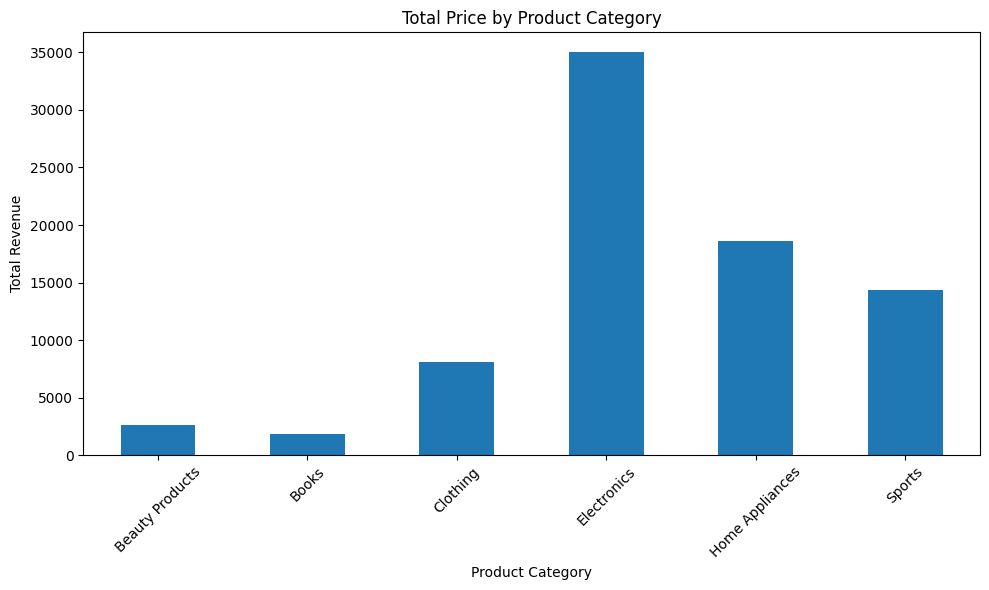

In [ ]:
# prompt: Create a program to draw a bar chart, to see the total price for each product category.

import matplotlib.pyplot as plt
category_total_price = df.groupby('Product Category')['Total Revenue'].sum()

plt.figure(figsize=(10, 6))
category_total_price.plot(kind='bar')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.title('Total Price by Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Asia is the largest purchaser of products followed by North America. For asia produk clothing and Sports, north america produk books and elektronic, europa produk home appliances and beauty products.

product electronics become the biggest total revenue for region north america. but need investigated about this colomn for net income.

# **Question 3**

Investigate the impact of payment methods on sales volume or revenue.

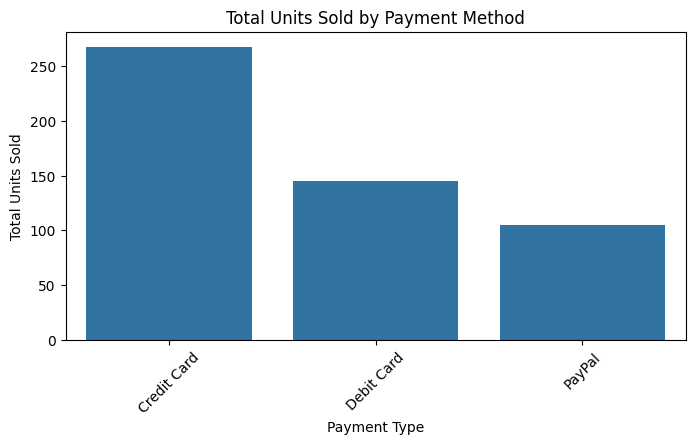

In [ ]:
# prompt: make chart bar for total each payment method

import matplotlib.pyplot as plt
payment_sales = df.groupby('Payment Method')['Units Sold'].sum()

plt.figure(figsize=(8, 4))
sns.barplot(x=payment_sales.index, y=payment_sales.values)
plt.xlabel('Payment Type')
plt.ylabel('Total Units Sold')
plt.title('Total Units Sold by Payment Method')
plt.xticks(rotation=45)
plt.show()


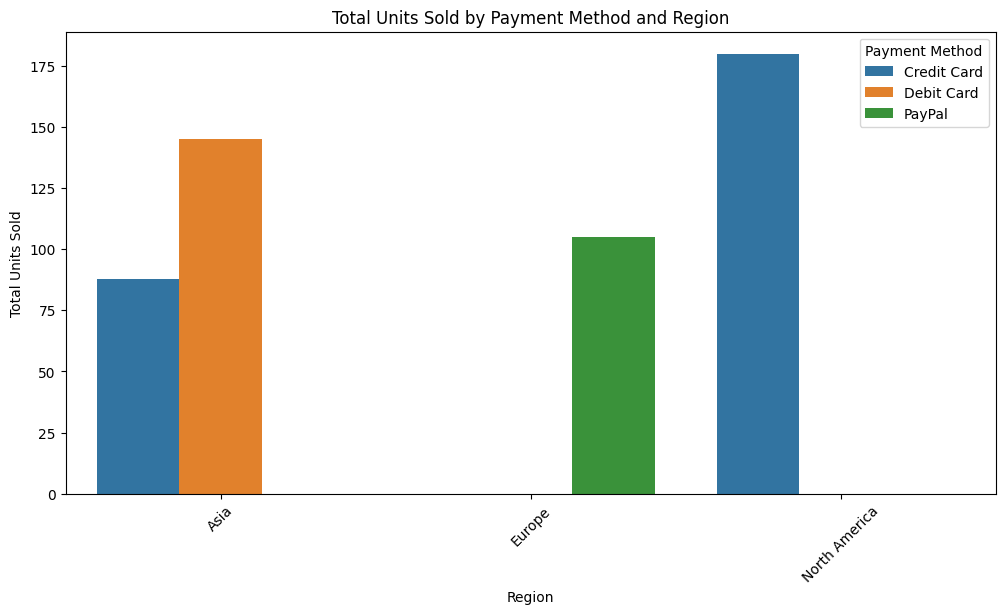

In [ ]:
# prompt: make chart bar each region for total payment method

import matplotlib.pyplot as plt
region_payment_sales = df.groupby(['Region', 'Payment Method'])['Units Sold'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Units Sold', hue='Payment Method', data=region_payment_sales)
plt.xlabel('Region')
plt.ylabel('Total Units Sold')
plt.title('Total Units Sold by Payment Method and Region')
plt.xticks(rotation=45)
plt.legend(title='Payment Method')
plt.show()


payment method for asia there is credit card and debit card, asia for paypal, north america for credit card. My investigate for each product category it is expected that the distribution of payment method usage will be more varied among various product categories.



# **Question 4**

Identify top-selling products within each category to optimize inventory and marketing strategies.

In [ ]:
# prompt: make count for top 5 product name of unit sold for each product category

top_products_by_category = df.groupby(['Product Category', 'Product Name'])['Units Sold'].sum().reset_index()
for category in top_products_by_category['Product Category'].unique():
  top_5 = top_products_by_category[top_products_by_category['Product Category'] == category].nlargest(5, 'Units Sold')
  print(f"Top 5 Products in {category}:")
  print(top_5)
  print()


Top 5 Products in Beauty Products:
   Product Category                         Product Name  Units Sold
0   Beauty Products     Anastasia Beverly Hills Brow Wiz           2
3   Beauty Products     CeraVe Hydrating Facial Cleanser           2
13  Beauty Products  First Aid Beauty Ultra Repair Cream           2
16  Beauty Products                    Glossier Boy Brow           2
19  Beauty Products    L'Occitane Shea Butter Hand Cream           2

Top 5 Products in Books:
   Product Category                                      Product Name  \
52            Books           The Catcher in the Rye by J.D. Salinger   
56            Books  The Girl with the Dragon Tattoo by Stieg Larsson   
70            Books            The Silent Patient by Alex Michaelides   
40            Books                             1984 by George Orwell   
41            Books                      Atomic Habits by James Clear   

    Units Sold  
52           7  
56           5  
70           5  
40           4  
4

# **Question 5**

Evaluate the performance of specific products or categories in different regions to tailor marketing campaigns accordingly.

**campaign product**
1. promosi produk dapat dilakukan pada bulan januari sampai maret dengan menawarkan clothing dan sports untuk daerah asia,
2. untuk region north amerika lakukanlah promosi produk elektronik karena menghasilkan total revenue terbesar diantara produk lainnya.
3. Selama campaign tawarkan diskon atau promo untuk meningkatkan minat kostumer.

**Payment Method**
1. daerah asia tawarkan penggunaan credit card dengan menawarkan diskon, cicilan tanpa bungaa, point belanja, dan lain-lain.
2. daerah nort amerika tawarkan pembayaran paypal.
3. coba cari opsi payment lokal yang disukai oleh warga setempat.

**Produk**
1. Sediakan lebih produk yang sering dibeli oleh kustomer untuk menyediakan demand.
2. Mendata terbaru secara rutin produk yang berhasil terjual dengan melibatkan inventaris.

**Optimasi di daerah**
1. Lakukan kampanye produk clothing dan Sport untuk daerah asia, perluaslah inovasi dengan trend dan kesukaan warga lokal.
2. kampanyekan produk elektronik di daerah north amerika, karena elektornik menghasilkan total revenue terbesar.
3. lakukan kampanye yang aggresive home appliances di daerah eurpa karena menhasilkan total revenue terbesar kedua setelah elektronik.

**Target Kampanye**
1. Perlu data lain yang mendukung analisa terget kampanye di setiap daerah
2. Lakukan lah promosi baik terhadap pembelian dengan payment method atau jenis produk.

**Customer Feedback**
1. kumpulkan feedback pelanggan tentang pengalaman payment dan produk untuk meningkatkan pengalam belanja.
2. lakukan komunikasi dengan pelanggan secara langsung pengalaman selama berbelanja.